In [104]:
import pandas as pd
import numpy as np
filename='https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/titanic-data.csv'
titanic=pd.read_csv(filename)
titanic.describe()
print(titanic.isnull().sum())
print '.................'
print titanic.info()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
.................
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [130]:
# there are 177 missing values in age. 
giving_age = titanic[titanic.Age.isnull() == False]
giving_age['Title'] =  [x[:x.index('.')].split(' ')[-1] for x in giving_age.Name]

mean_age_by_title = giving_age.groupby(["Title"])['Age'].mean()

mean_age_by_title.dtype()

titanic['Title'] =  [x[:x.index('.')].split(' ')[-1] for x in titanic.Name]

missing_age = titanic[titanic.Age.isnull() == True]



/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


TypeError: 'numpy.dtype' object is not callable

Survived    0    1
Sex               
female     81  233
male      468  109


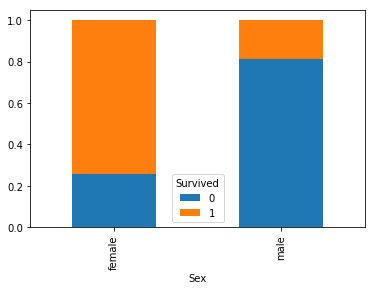

In [84]:
%pylab inline
by_sex = pd.crosstab(titanic['Sex'],titanic['Survived'])
print(by_sex)
dummy = by_sex.div(by_sex.sum(1).astype(float),axis= 0 ).plot(kind='bar',stacked = True)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


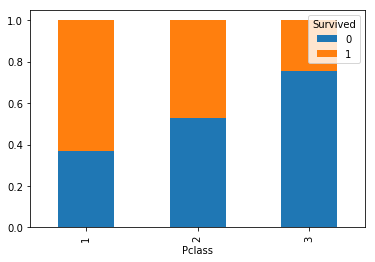

In [93]:
by_class = pd.crosstab(titanic['Pclass'],titanic['Survived'])
print(by_class)
dummy = by_class.div(by_class.sum(1).astype(float), axis=0).plot(kind= 'bar',stacked = True)

Survived    0    1
alone             
False     175  179
True      374  163


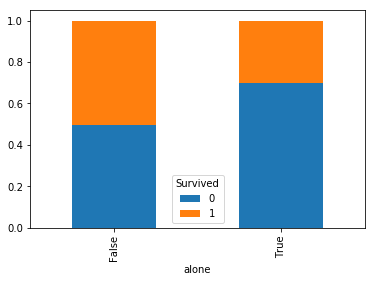

In [114]:
titanic['family']=titanic['SibSp']+titanic['Parch']
titanic['alone']=(titanic['family']==0)
by_alone = pd.crosstab(titanic['alone'],titanic['Survived'])
print by_alone
dummy = by_alone.div(by_alone.sum(1).astype(float), axis=0).plot(kind= 'bar',stacked = True)